In [1]:
import math
import cv2
import numpy as np
from time import time
import mediapipe as mp
import matplotlib.pyplot as plt

In [2]:
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.3, model_complexity=2)
mp_drawing = mp.solutions.drawing_utils 

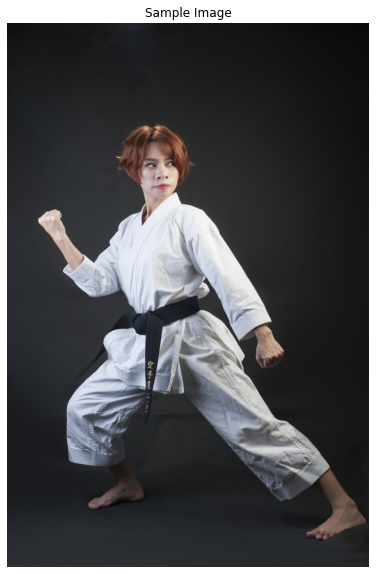

In [3]:
sample_img = cv2.imread('media/sample.jpg')
plt.figure(figsize = [10, 10])
plt.title("Sample Image");plt.axis('off');plt.imshow(sample_img[:,:,::-1]);plt.show()

In [5]:
# Perform pose detection after converting the image into RGB format.
results = pose.process(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))

if results.pose_landmarks:
    #printing first two landmarks (NOSE & LEFT_EYE_INNER)
    for i in range(2):
        print(f'{mp_pose.PoseLandmark(i).name}:\n{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value]}') 

NOSE:
x: 0.42638272047042847
y: 0.28251832723617554
z: -0.567802369594574
visibility: 1.0

LEFT_EYE_INNER:
x: 0.43525373935699463
y: 0.2628730535507202
z: -0.5315181612968445
visibility: 0.9999998807907104



In [6]:
# Retrieve the height and width of the sample image.
image_height, image_width, _ = sample_img.shape
if results.pose_landmarks:
    for i in range(2):
        
        # Display the found landmarks after converting them into their original scale.
        print(f'{mp_pose.PoseLandmark(i).name}:') 
        print(f'x: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].x * image_width}')
        print(f'y: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].y * image_height}')
        print(f'z: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].z * image_width}')
        print(f'visibility: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].visibility}\n')

NOSE:
x: 306.56917601823807
y: 305.1197934150696
z: -408.2499037384987
visibility: 1.0

LEFT_EYE_INNER:
x: 312.94743859767914
y: 283.90289783477783
z: -382.1615579724312
visibility: 0.9999998807907104



In [7]:
results.pose_landmarks.landmark[mp_pose.PoseLandmark(0).value]

x: 0.42638272047042847
y: 0.28251832723617554
z: -0.567802369594574
visibility: 1.0

We only have 4 points with every landmark. Don't know where the 5th coordinate came from (see above & below).

In [8]:
results.pose_landmarks.landmark

[x: 0.42638272047042847
y: 0.28251832723617554
z: -0.567802369594574
visibility: 1.0
, x: 0.43525373935699463
y: 0.2628730535507202
z: -0.5315181612968445
visibility: 0.9999998807907104
, x: 0.44653812050819397
y: 0.2619427740573883
z: -0.5321813225746155
visibility: 0.9999998807907104
, x: 0.45707035064697266
y: 0.2610160708427429
z: -0.5319093465805054
visibility: 0.9999998807907104
, x: 0.40487203001976013
y: 0.2650200426578522
z: -0.5119263529777527
visibility: 0.9999998807907104
, x: 0.39377498626708984
y: 0.26561984419822693
z: -0.5125192403793335
visibility: 0.9999998807907104
, x: 0.3836667239665985
y: 0.2662458121776581
z: -0.512709379196167
visibility: 0.9999997615814209
, x: 0.467048704624176
y: 0.26810434460639954
z: -0.33002617955207825
visibility: 0.9999998807907104
, x: 0.3642994463443756
y: 0.2733832001686096
z: -0.23709066212177277
visibility: 0.9999994039535522
, x: 0.44609352946281433
y: 0.2966165840625763
z: -0.48824021220207214
visibility: 0.9999992847442627
, x: 0

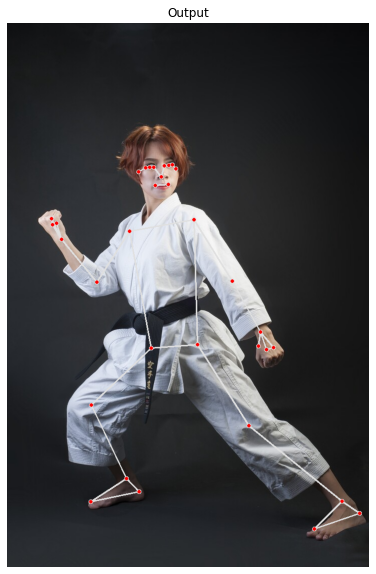

In [10]:
img_copy = sample_img.copy()
if results.pose_landmarks:
    

    mp_drawing.draw_landmarks(image=img_copy, landmark_list=results.pose_landmarks, connections=mp_pose.POSE_CONNECTIONS)
    fig = plt.figure(figsize = [10, 10])
    plt.title("Output");plt.axis('off');plt.imshow(img_copy[:,:,::-1]);plt.show()

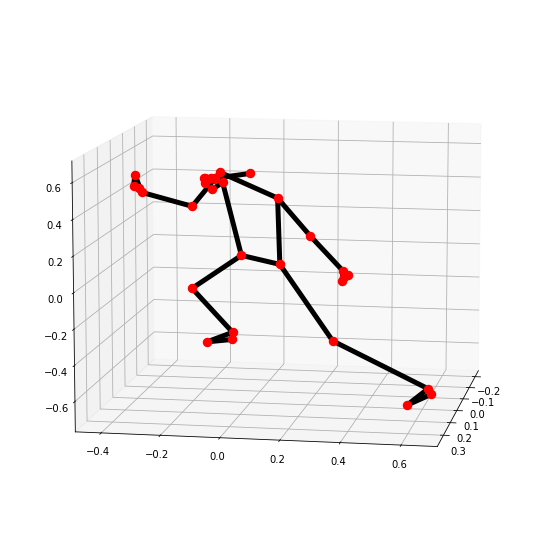

In [11]:
mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

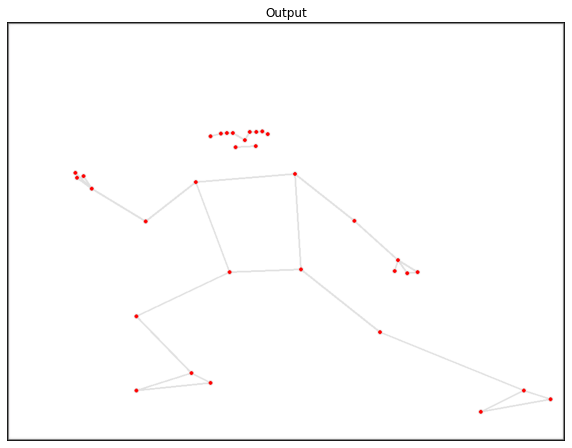

In [25]:
white = cv2.imread('media/white.webp')
mp_drawing.draw_landmarks(image=white, landmark_list=results.pose_landmarks, connections=mp_pose.POSE_CONNECTIONS)
fig = plt.figure(figsize = [10, 10])
plt.title("Output");plt.axis('off');plt.imshow(white[:,:,::-1]);plt.show()

### ANGLE HEURISTICS

In [26]:
def calculateAngle(landmark1, landmark2, landmark3):
    '''
    This function calculates angle between three different landmarks.
    Args:
        landmark1: The first landmark containing the x,y and z coordinates.
        landmark2: The second landmark containing the x,y and z coordinates.
        landmark3: The third landmark containing the x,y and z coordinates.
    Returns:
        angle: The calculated angle between the three landmarks.

    '''

    x1, y1, _ = landmark1
    x2, y2, _ = landmark2
    x3, y3, _ = landmark3

    angle = math.degrees(math.atan2(y3 - y2, x3 - x2) - math.atan2(y1 - y2, x1 - x2))
    
    if angle < 0:

        angle += 360
    return angle

In [27]:
angle = calculateAngle((558, 326, 0), (642, 333, 0), (718, 321, 0))
print(f'The calculated angle is {angle}')

The calculated angle is 166.26373169437744
